In [31]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
from print_utils import printV

plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

In [32]:
X_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852, 2, 1, 35]
])
y_train = np.array([460, 232, 178])

In [33]:
print(f"X Shape:{X_train.shape},X Type:{type(X_train)}")
print(f"y Shape:{y_train.shape},y Type:{type(y_train)}")

X Shape:(3, 4),X Type:<class 'numpy.ndarray'>
y Shape:(3,),y Type:<class 'numpy.ndarray'>


In [34]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [35]:
def predict_single_loop(x, w, b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        p += (x[i] * w[i])
    return p + b


In [36]:
x_vec = X_train[0, :]

f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"x_vec={x_vec},shape={x_vec.shape}")
printV('f_wb', f_wb)


x_vec=[2104    5    1   45],shape=(4,)
f_wb=459.9999976194083,shape=()


In [37]:
def predict(x, w, b):
    return np.dot(x, w) + b

In [38]:
printV('f_wb', predict(x_vec, w_init, b_init))

f_wb=459.9999976194083,shape=()


In [39]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost += (predict(X[i], w, b) - y[i]) ** 2
    cost *= (1 / 2 / m)
    return cost

In [40]:
cost = compute_cost(X_train, y_train, w_init, b_init)
printV('cost', cost)

cost=1.5578904428966628e-12,shape=()


In [41]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        dj_dw += ((predict(X[i], w, b) - y[i]) * X[i])
        dj_db += (predict(X[i], w, b) - y[i])
    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw


In [42]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
printV('tmp_dj_db', tmp_dj_db)
printV('tmp_dj_dw', tmp_dj_dw)

tmp_dj_db=-1.6739251501955248e-06,shape=()
tmp_dj_dw=[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05],shape=(4,)


In [43]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)

        w -= (alpha * dj_dw)
        b -= (alpha * dj_db)

        if i < 100000:
            J_history.append(cost_function(X, y, w, b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration={i:4d},cost={J_history[-1]:8.2f}")

    return w, b, J_history



In [44]:
initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(
    X_train, y_train,
    initial_w, initial_b,
    compute_cost, compute_gradient,
    alpha, iterations)
printV('w_final', w_final)
printV('b_final', b_final)

for i in range(X_train.shape[0]):
    print(f'prediction:{predict(X_train[i], w_final, b_final)},target Value:{y_train[i]}')

Iteration=   0,cost= 2529.46
Iteration= 100,cost=  695.99
Iteration= 200,cost=  694.92
Iteration= 300,cost=  693.86
Iteration= 400,cost=  692.81
Iteration= 500,cost=  691.77
Iteration= 600,cost=  690.73
Iteration= 700,cost=  689.71
Iteration= 800,cost=  688.70
Iteration= 900,cost=  687.69
w_final=[ 0.2   0.   -0.01 -0.07],shape=(4,)
b_final=-0.002235407530932535,shape=()
prediction:426.18530497189204,target Value:460
prediction:286.1674720078562,target Value:232
prediction:171.46763087132317,target Value:178


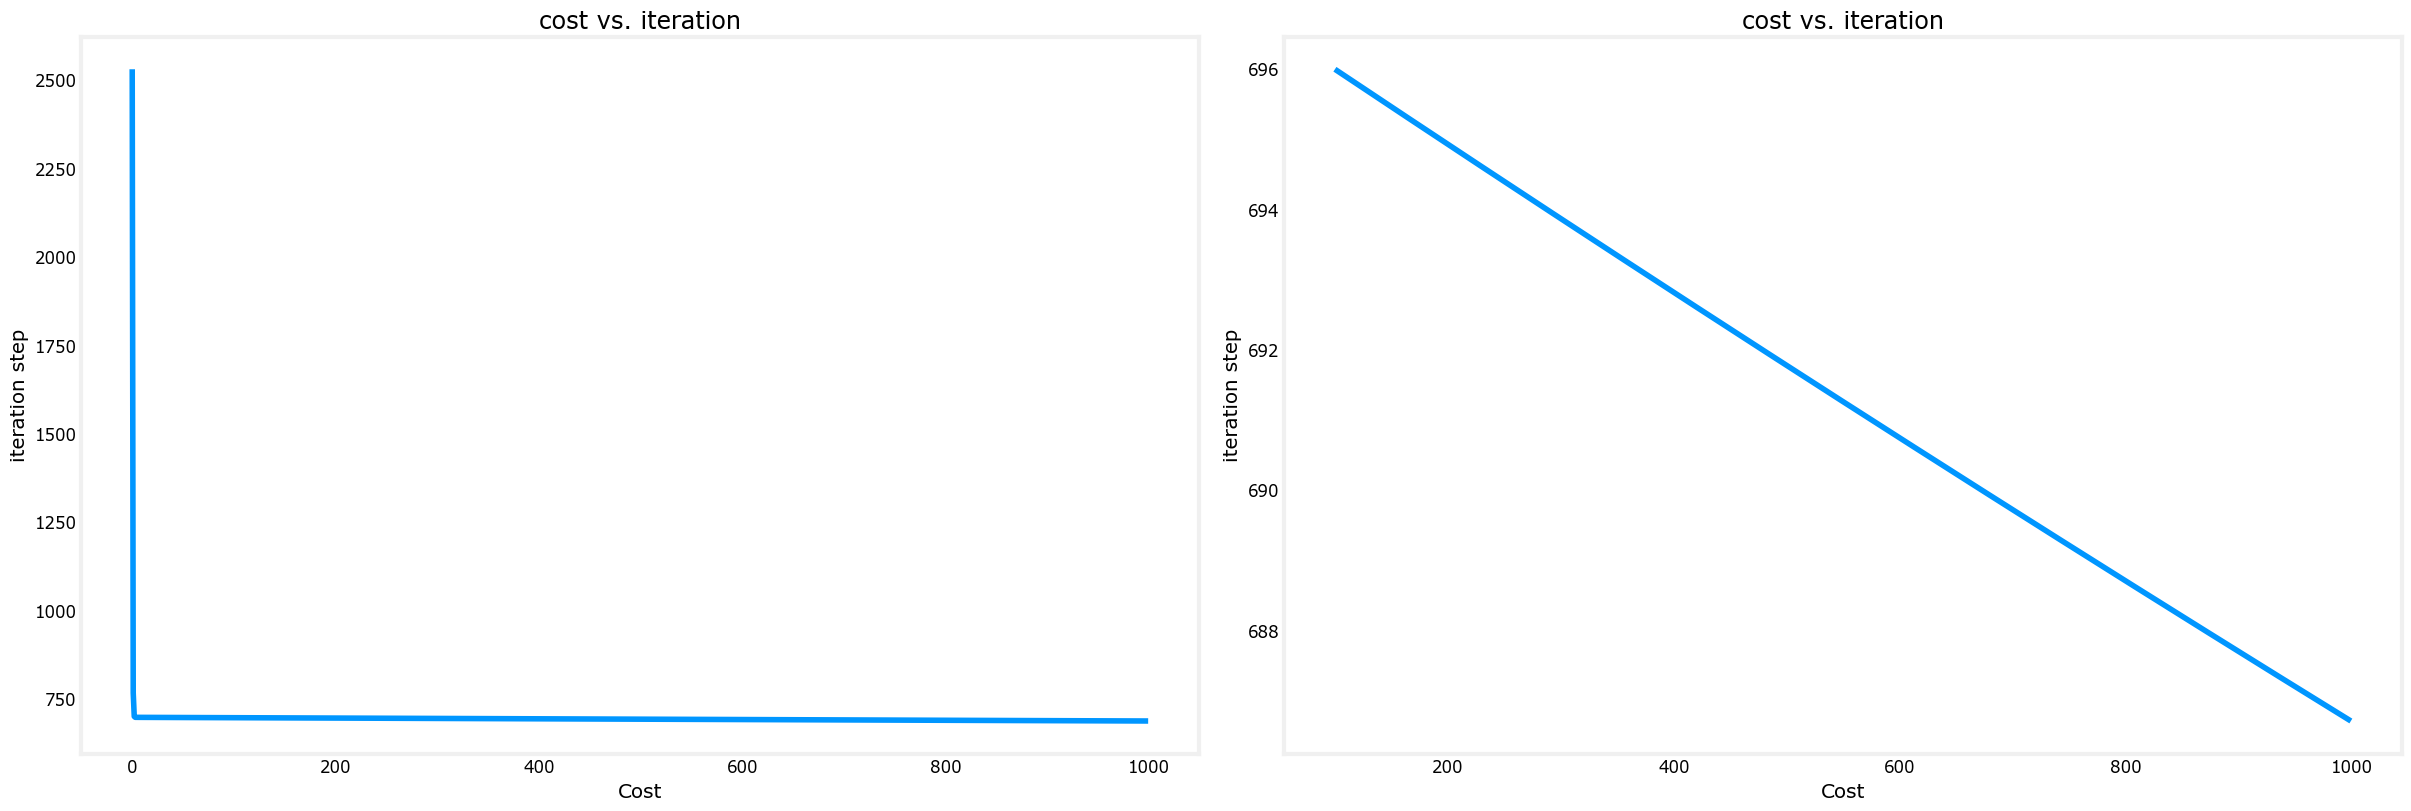

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(24, 8))
ax1.plot(J_hist)
ax1.set_title("cost vs. iteration")
ax1.set_xlabel('Cost')
ax1.set_ylabel('iteration step')

ax2.plot(100+np.arange(len(J_hist[100:])), J_hist[100:])
ax2.set_title("cost vs. iteration")
ax2.set_xlabel('Cost')
ax2.set_ylabel('iteration step')
plt.show()